In [4]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models
from cellpose.io import imread
import glob
from pathlib import Path
from PIL import Image, ImageSequence
# model_type='cyto' or 'nuclei' or 'cyto2'
model = models.Cellpose(gpu=True, model_type="cyto")

# list of files
# PUT PATH TO YOUR FILES HERE!
dir_path = Path('D://xing-vimentin-dic-pipeline//src//livecell_dev//cxa-data//june_2022_data//day0_Notreat_Group1_wellA1_RI_MIP_stitched')
img_list = sorted(glob.glob(str(dir_path/"*tif")))

In [28]:
img_list[:4]

['D://xing-vimentin-dic-pipeline//src//livecell_dev//cxa-data//june_2022_data//day0_Notreat_Group1_wellA1_RI_MIP_stitched//T0.tif',
 'D://xing-vimentin-dic-pipeline//src//livecell_dev//cxa-data//june_2022_data//day0_Notreat_Group1_wellA1_RI_MIP_stitched//T1.tif',
 'D://xing-vimentin-dic-pipeline//src//livecell_dev//cxa-data//june_2022_data//day0_Notreat_Group1_wellA1_RI_MIP_stitched//T10.tif',
 'D://xing-vimentin-dic-pipeline//src//livecell_dev//cxa-data//june_2022_data//day0_Notreat_Group1_wellA1_RI_MIP_stitched//T100.tif']

In [6]:
imgs = [imread(f) for f in img_list]
nimg = len(imgs)

In [7]:
def segment_single_image_by_cellpose(image, model, channels = [[0, 0]], diameter=150):
    masks, flows, styles, diams = model.eval(imgs, diameter=diameter, channels=channels)
    return masks[0]

def segment_single_images_by_cellpose(images, model, channels = [[0, 0]], diameter=150):
    masks, flows, styles, diams = model.eval(images, diameter=diameter, channels=channels)
    return masks


In [10]:
# imgs_subset = imgs[:5] # for quick test
imgs_subset = imgs[:] # for quick test
masks = segment_single_images_by_cellpose(imgs_subset, model, channels = [[0, 0]], diameter=150)

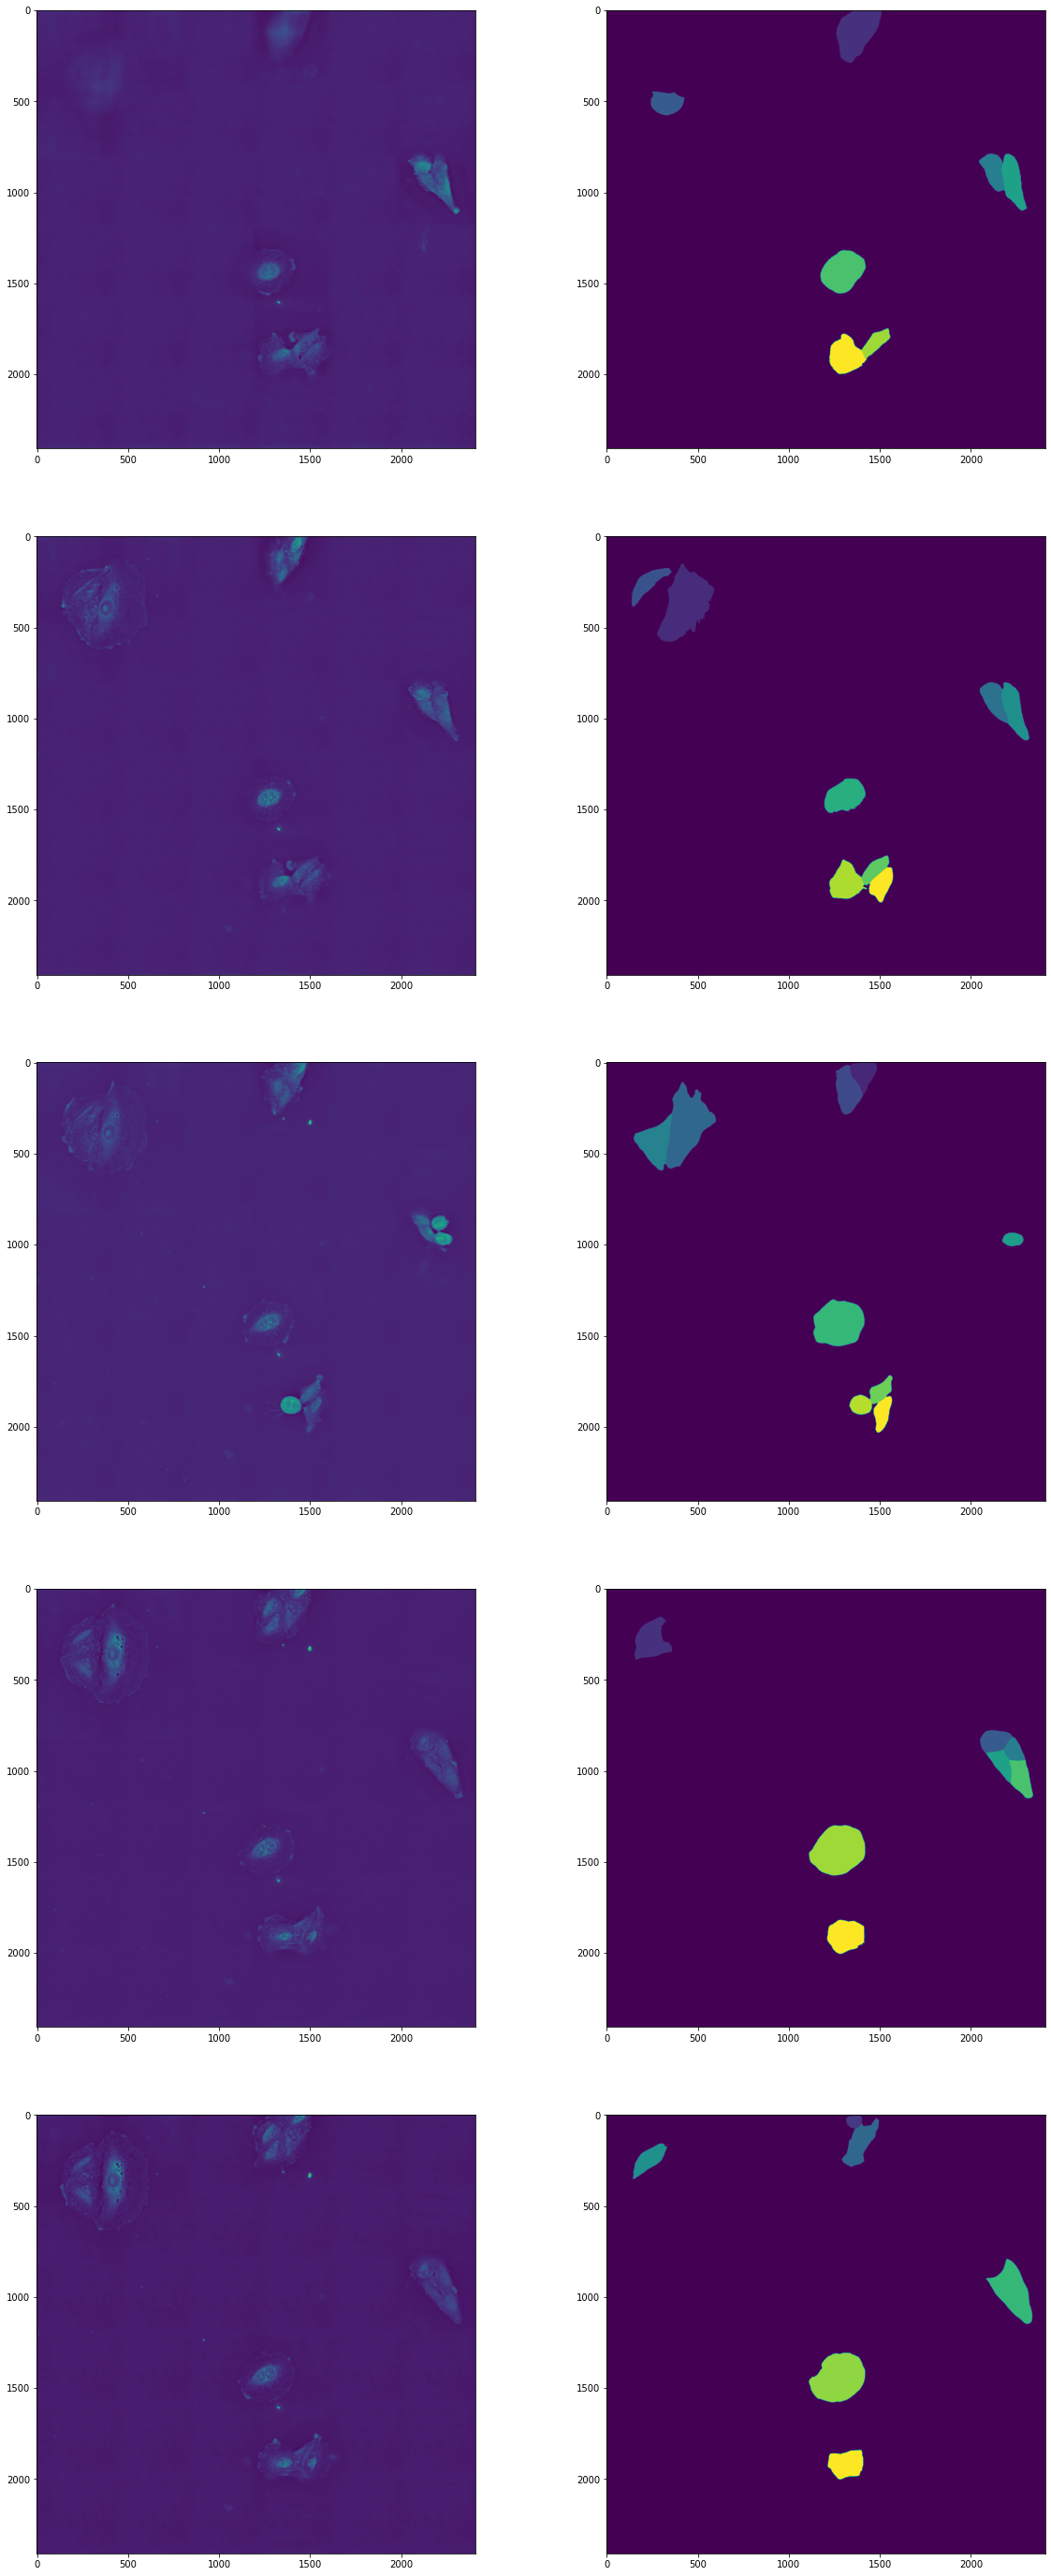

In [11]:
def visualize_segmentation_results(imgs, masks):
    nimg = len(imgs)
    fig, axes = plt.subplots(nimg, 2, figsize=(20, 10 * nimg))
    for idx in range(nimg):
        axes[idx, 0].imshow(imgs[idx])
        axes[idx, 1].imshow(masks[idx])

visualize_segmentation_results(imgs_subset, masks)

In [13]:
type(masks[0])

numpy.ndarray

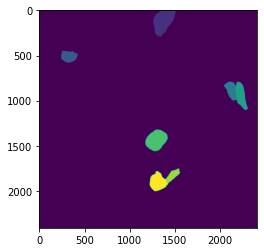

In [23]:
img = Image.fromarray(masks[0])
plt.imshow(img)
# img.save("./test.png") # for testing

In [27]:
out_dir = Path("./segs")
for idx, mask in enumerate(masks):
    temp_img = Image.fromarray(mask)
    img = Image.fromarray(masks[0])
    img.save(out_dir / ("./T%d.png" % (idx + 1)))
